# Proceso estándar de regresión

1. Separar datos de entrenamiento / prueba
2. Normalizar datos / Crear un normalizador
3. Crear modelo (NN)
4. Entrenar
5. Evaluar resultados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Red neuronal secuencial
from tensorflow.keras.models import Sequential
# Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
# Optimizador
from tensorflow.keras.optimizers import Adam

In [3]:
# asegurar que los resultados sean "reproducibles"
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

### Datos de entrenamiento / prueba

In [6]:

x_train = pd.read_csv('data_train.csv')
#seleciona la ultima columna MPG
y_train = x_train.loc[:,'MPG']
#seleciona la toda informacion sin la ultima columna MPG
x_train=x_train.iloc[:,0:9]

x_test = pd.read_csv('data_test.csv')
y_test = x_test.loc[:,'MPG']
x_test=x_test.iloc[:,0:9]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(314, 9)
(314,)
(78, 9)
(78,)


### Normalización

In [7]:
def crear_normalizador(datos):
    normalizer = Normalization(axis=-1)
    normalizer.adapt(np.array(datos))
    return normalizer

In [8]:
normalizador = crear_normalizador(x_train)

### Creación Red Neuronal

In [24]:
def crear_nn_regresion(norm):
    model = Sequential([
        norm,
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(loss='mean_absolute_error', optimizer=Adam(0.001))
    return model

In [25]:
nn = crear_nn_regresion(normalizador)

### Entrenamiento del modelo

In [26]:
history = nn.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=1,
    epochs=100
)

Epoch 1/100
8/8 [==============================] - 1s 32ms/step - loss: 22.9174 - val_loss: 23.0578
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 22.1004 - val_loss: 21.7537
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 20.3999 - val_loss: 18.9663
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 16.6336 - val_loss: 12.9892
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 9.4029 - val_loss: 5.3201
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 6.7632 - val_loss: 6.0200
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 4.5592 - val_loss: 4.0906
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 3.9089 - val_loss: 3.4149
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 3.4235 - val_loss: 3.1093
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 3.0033 - val_loss: 2.9331
Epoch 11/100
8/8

### Evaluar el rendimiento del modelo

In [27]:
nn.evaluate(x_test, y_test, verbose=0)

1.902463674545288

In [20]:
# Creación de predicciones
y_pred = nn.predict(x_test).flatten()

3/3 [==============================] - 0s 4ms/step


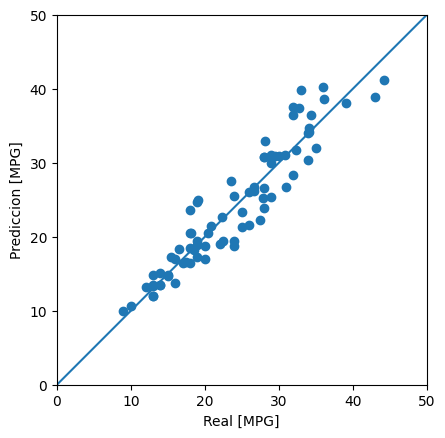

In [21]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('Real [MPG]')
plt.ylabel('Prediccion [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

In [22]:
# Exportar el modelo
nn.save('modelo_regresion')
nn.save('modelo_regresion.h5')

INFO:tensorflow:Assets written to: modelo_regresion\assets


INFO:tensorflow:Assets written to: modelo_regresion\assets


In [23]:
#probar el modelo exportado con un nuevo conjunto de datos

model = tf.keras.models.load_model('modelo_regresion')
model.summary()
predict = model.predict([8, 350, 165, 3693, 11.5, 70, 1, 0, 0]).flatten()
print(predict)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,564
Trainable params: 4,545
Non-trainable params: 19
_____________________________________________________

1/1 [==============================] - 0s 129ms/step
[28.83434]
